# Neural Networks

Content:
1. Detailed example: Two-layer MLP for regression
    - Forward pass: Calculate the values of $z_1$, $z_2$, and $y$
    - Compute the mean squared error
    - Using backpropagation, compute the gradient or the error w.r.t the weights $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
    - Compute the updated weights for $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
2. PyTorch: 2-layer MLP for classification
    - Create and train a 2-layer MLP

# 1) Detailed example: Two-layer MLP for regression
We'll be working through a forward and back-propagation example in all its details for a 2-layer MLP for regression. Our network has the following structure:

![](two-layer-nn.svg)

Where 
    $$
    z_j = \text{ReLU}\left(a_j \right)
    \qquad
    a_j = \sum_i w^{(1)}_{ij} x_i
    \qquad
    y_j = \sum_i w^{(2)}_{ij} z_i
    $$
and the biases 
    $$
    x_0 = z_0 = 1
    $$

Suppose, we have the weights
    $$
    \mathbf{W}^{(1)} = \left[ 
        \begin{matrix}
        0.1 & 0.2\\
        -1.1 & 1.2\\
        -2.1 & 2.2
        \end{matrix}
    \right]
    \qquad
    \mathbf{w}^{(2)} = \left[ 
        \begin{matrix}
        -0.1\\
        1.1 \\
        2.2
        \end{matrix}
    \right]
    $$
Notice that the bias weights are included in the weight matrix. Relating it to the drawing, we have $w_{0,1} = 0.1$, $w_{1,2} = 1.2$

Moreover, we are given an input
    $$
    \mathbf{x} = \left[ 
        \begin{matrix}
        0.1 \\
        0.2
        \end{matrix}
    \right]
    $$
    
Relating these to the drawing, we have $w^{(1)}_{1,2} = 1.2$ and $x_1 = 0.1$

#### Matrix notation
Notice we use matrix notation:
$$
W_k = \begin{bmatrix}
w^{(k)}_{0,1} & \cdots & w^{(k)}_{0,l_k} \\
\vdots & \ddots & \vdots \\
w^{(k)}_{k_1-1,1} & \cdots & w^{(k)}_{k-1,l_k}
\end{bmatrix},
$$
meaning the row indices start from 0 and the column indices start from 1.
#### Forward Pass

First, we define the activations for the first and second layers as a linear combination of inputs and weights, plus a bias term. For the first layer:

$$
a_1 = w_1^T \begin{bmatrix} 1 \\ x \end{bmatrix}
$$

This activation $ a_1 $ then passes through a non-linear activation function $ h $:

$$
z_1 = h(a_1)
$$

Similarly, for the second layer:

$$
a_2 = w_2^T \begin{bmatrix} 1 \\ z_1 \end{bmatrix}
$$

And the output of the network $ y $ is obtained by passing $ a_2 $ through the activation function:

$$
y(x, \{w_1, w_2\}) = z_2 = h(a_2)
$$

#### Backward Pass

During backpropagation, we first apply the chain rule to compute the gradient of the cost $ E $ w.r.t the weights $ W_2 $:

$$
\frac{\partial E}{\partial W_2} = \frac{\partial a_2}{\partial W_2} \frac{\partial E}{\partial a_2}^T
$$

Similarly, we apply the chain rule for the weights $ W_1 $:

$$
\frac{\partial E}{\partial W_1} = \frac{\partial a_1}{\partial W_1} \frac{\partial E}{\partial a_1}^T
$$

Now, let's detail the parts of these chain rule expansions:

The gradient of the error w.r.t the output activation $ a_2 $ is:

$$
\frac{\partial E}{\partial a_2} = y - t,
$$

and the gradient of $a_2$ w.r.t $w_2$ is:
$$
\frac{\partial a_2}{\partial W_2} = \begin{bmatrix} 1 \\ z_1 \end{bmatrix}.
$$

The gradient of the output activation $ a_2 $ w.r.t $ z_1 $ is represented by the weights $ W_2 $, since $ a_2 $ is a linear transformation of $ z_1 $:

$$
\frac{\partial a_1}{\partial z_1} = W_2
$$

For the first layer, the derivative of $ z_1 $ w.r.t $ a_1 $ is the derivative of the Sigmoid activation function (see lecture slide for other actiavtion function derivatives):

$$
\frac{\partial z_1}{\partial a_1} = h(a_1) \odot (1 - h(a_1)) = z_1 \odot (1 - z_1)
$$

Finally, we find the gradient of the error $ E $ w.r.t the first layer activation $ a_1 $ by combining the previous terms:

$$
\frac{\partial E}{\partial a_1} = \frac{\partial z_1}{\partial a_1} \frac{\partial a_2}{\partial z_1} \frac{\partial E}{\partial a_2}
$$

These gradients are used to perform the weight updates in gradient descent to train our neural network.ate on both $ W_1 $ and $ W_2 $.


## 1.1) Forward pass: Calculate the values of $z_1$, $z_2$, and $y$

Using the values and formulas given above, as well as the ReLU activation function we determin the values. 

In [1]:
import numpy as np

x = np.array([0.1, 0.2])
w1 = np.array([[0.1, 0.2], [-1.1, 1.2], [-2.1, 2.2]])
w2 = np.array([-0.1, 1.1, 2.2])

def ReLU(a1):
    return [a if a > 0 else 0 for a in a1]

a = w1.T@np.insert(x, 0, 1)

z = ReLU(a)

y = w2.T@np.insert(z, 0, 1)

print("z1, z2, y:", z[0],z[1],y)

z1, z2, y: 0 0.7600000000000001 1.5720000000000003


## 1.2) Compute the mean squared error
Suppose our target $t=2$.

In [2]:
t = 2
error = 1/2 * (y-t)**2
print("The mean squared error", error)

The mean squared error 0.09159199999999988


## 1.3) Backpropagation and computeing the gradient or the error w.r.t the weights $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 

In [3]:
dE_dy = y - t

dE_dw2_2 = dE_dy * z[1]

dE_dw1_22 = dE_dy * w2[2] * (a[1] > 0) * x[1]

print("Gradient of error w.r.t w^(2)_2:", dE_dw2_2)
print("Gradient of error w.r.t w^(1)_{2,2}:", dE_dw1_22)

Gradient of error w.r.t w^(2)_2: -0.32527999999999985
Gradient of error w.r.t w^(1)_{2,2}: -0.1883199999999999


## 1.4) Compute the updated weights for $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 

In [4]:
eta = 0.1
w2[2] -= eta * dE_dw2_2 
w1[2,1] -= - eta * dE_dw1_22 

print("The updated weights for w^{(2)}_2 and w^{(1)}_{2,2}", w2[2], w1[2][1])

The updated weights for w^{(2)}_2 and w^{(1)}_{2,2} 2.2325280000000003 2.181168


# 2) PyTorch: 2-layer MLP for classification
We'll be working with the classic MNIST dataset, which we can easily get via PyTorch

In [5]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('../data', train=False, download=True, transform=transform)

train_loader = DataLoader(
    train_data,
    batch_size = 64,
    shuffle=True,
)

test_loader = DataLoader(
    test_data,
    batch_size = 64,
)

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 35673679.36it/s]


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 13926844.54it/s]

Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 20543451.74it/s]

Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw


100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



A few steps happened here:
1. The dataset (train and test) was downloaded 
1. We created a `DataLoader` for each data split. Using this, we get batches of data (64 examples per batch here)
1. We told asked for the training data to be shuffled

Lets see what we get in a batch:

In [6]:
data, targets = next(iter(train_loader))
data.shape, targets.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

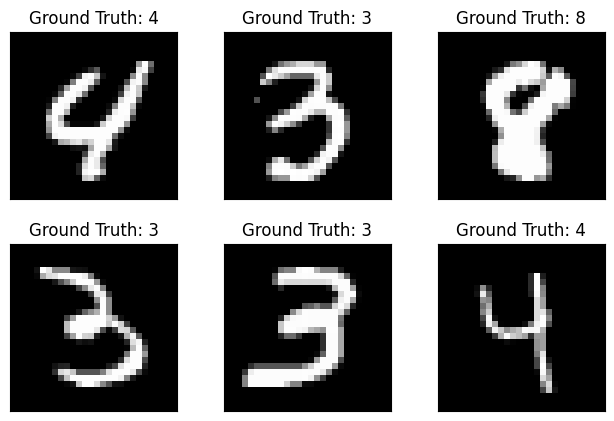

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(targets[i]))
    plt.xticks([])
    plt.yticks([])

## 2.1) Create and train a 2-layer MLP
For the network, we use a single hidden layer of 512 neurons with a ReLU activation function for the first weight Linear layer. The output of the second Linear layer should be a softmax.

For optimisation, we use the SGD optimizer with learning rate of 0.001, and the negative log-likelihood loss.

The network is trained for 5 epochs on the train data, and the prediction accuracy on the test data is reported.

In [8]:
from torch.nn import Linear, Module
from torch.nn.functional import relu, log_softmax, nll_loss
from torch.optim import SGD
from torch.utils.data import DataLoader

class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(in_features=784, out_features=512)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(512, 10)
        self.log_softmax = torch.nn.LogSoftmax(dim=1)  

    def forward(self, x):
        # Flatten the input data
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        output = self.log_softmax(x)
        return output

def train(
    model:Module, 
    train_loader:DataLoader, 
    optimizer:SGD, 
    epoch:int, 
    log_interval = 50
):
    # Set model to train mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Reset the gradients
        optimizer.zero_grad()
        
        # Feed the data through the model
        output = model(data)
        
        # Compute the negative log-likelihood loss
        loss = nll_loss(output, target)
        
        # Backward propagate the gradients
        loss.backward()
        
        # Perform an update step using the optimizer
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            # Log (Optional)
            pass

def test(model:Module, test_loader:DataLoader):
    # Set model to evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    
    # Don't accumulate gradients
    with torch.no_grad():
        for data, target in test_loader:
            # Feed the data through the model
            output = model(data)
            
            # Predict the class (it is the index of the max log-probability)
            test_loss += nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            
            # Add to the number of correct
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= len(test_loader.dataset)

    # Print results
    print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct, 
        len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)
    ))

In [9]:
model = Net()
optimizer = SGD(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch, log_interval=50)
    test(model, test_loader)


Test set: Accuracy: 8241/10000 (82%)


Test set: Accuracy: 8666/10000 (87%)


Test set: Accuracy: 8827/10000 (88%)


Test set: Accuracy: 8926/10000 (89%)


Test set: Accuracy: 8992/10000 (90%)

